# MNIST Single Layer Network

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

In [1]:
%%bash
tf_version='2.0.0rc0'
if pip freeze | grep -q "^tensorflow==${tf_version}$"; then
  echo "tensorflow==${tf_version} is already installed. No actions are required."
else
  echo "Installing tensorflow==${tf_version}. Don't forget to restart the runtime."
  pip install tensorflow==${tf_version}
fi

tensorflow==2.0.0rc0 is already installed. No actions are required.


####[MSL-01]
Import modules and set random seeds.

In [0]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190228)
tf.random.set_seed(20190228)

####[MSL-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11493376/11490434 [==============================] - 0s 0us/step


####[MSL-03]
Define a model with a single hidden layer.

In [4]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(28*28,),
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1024)              803840    
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


####[MSL-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSL-05]
Train the model. It acheves the 98.0% accuracy for the test dataset.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2311 - acc: 0.9339 - val_loss: 0.1189 - val_acc: 0.9643
Epoch 2/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0909 - acc: 0.9734 - val_loss: 0.0828 - val_acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0558 - acc: 0.9835 - val_loss: 0.0669 - val_acc: 0.9788
Epoch 4/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0390 - acc: 0.9887 - val_loss: 0.0619 - val_acc: 0.9801
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0254 - acc: 0.9925 - val_loss: 0.0589 - val_acc: 0.9821
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0186 - acc: 0.9949 - val_loss: 0.0605 - val_acc: 0.9823
Epoch 7/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0146 - acc: 0.9957 - val_lo

####[MSL-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

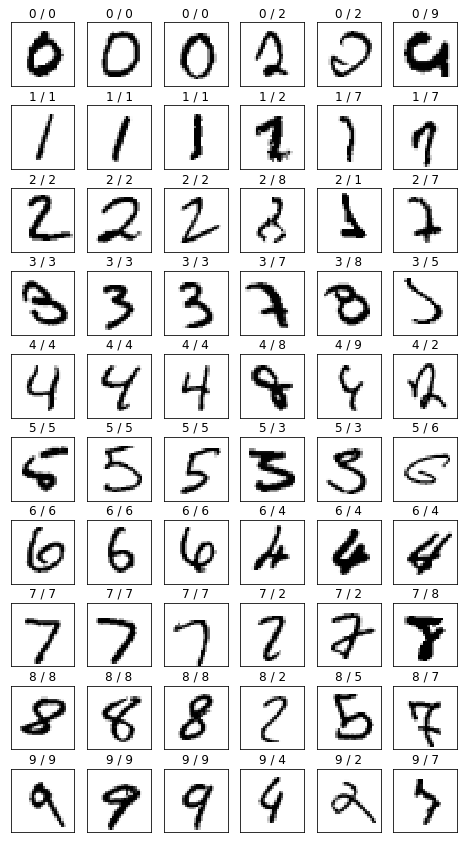

In [7]:
p_val = model.predict(np.array(test_images))
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
  indices = list(correct[correct['pred']==i].index[:3]) \
              + list(incorrect[incorrect['pred']==i].index[:3])
  for c, image in enumerate(test_images[indices]):
            subplot = fig.add_subplot(10, 6, i*6+c+1)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
            subplot.imshow(image.reshape((28, 28)),
                           vmin=0, vmax=1, cmap=plt.cm.gray_r)